In [25]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data = pd.read_csv('returns.csv', index_col = 0)
data.index = pd.to_datetime(data.index)
data = data[1:]
data.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.076389,-0.084310,NaN,NaN,-0.028572,-0.005435,NaN,-0.083889,-0.050589,-0.010416,...,NaN,-0.037568,NaN,0.023026,-0.019153,NaN,-0.020101,NaN,-0.014428,NaN
2000-01-05,-0.062030,0.014633,NaN,NaN,-0.001838,0.092896,NaN,0.019771,0.014598,-0.015790,...,NaN,0.052975,NaN,0.038585,0.054515,NaN,0.005129,NaN,0.019144,NaN
2000-01-06,-0.038077,-0.086539,NaN,NaN,0.034991,-0.010000,NaN,0.008163,-0.027337,0.005347,...,NaN,0.046778,NaN,-0.009288,0.051697,NaN,-0.008503,NaN,-0.054144,NaN
2000-01-07,0.083334,0.047369,NaN,NaN,0.010676,0.055556,NaN,0.048583,0.028106,0.015958,...,NaN,-0.032883,NaN,0.000000,-0.002934,NaN,-0.022299,NaN,-0.011098,NaN
2000-01-10,0.060577,-0.017588,NaN,NaN,-0.007042,0.033493,NaN,0.038610,0.087051,0.000000,...,NaN,-0.004359,NaN,0.000000,-0.013981,NaN,0.040350,NaN,0.033668,NaN


In [4]:
monthly_dates = data.resample("MS").last().index
monthly_dates

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=288, freq='MS')

In [6]:
from pandas.tseries.offsets import MonthEnd
winnerLosers = pd.DataFrame()

for month in monthly_dates[37:]:
    end = month
    beg = month - relativedelta(months = 37)
    returns36month = data[(data.index >= beg) & (data.index < end)]
    returns36month = returns36month + 1
    cum36 = returns36month.prod() - 1

    winnerLosers[month] = cum36

winnerLosers = winnerLosers.T

/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_65206/3564528671.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  winnerLosers[month] = cum36


In [8]:
winnerLosers

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2003-02-01,-0.771111,-0.743428,0.000000,0.000000,0.158968,1.653912,0.090969,-0.190522,-0.469328,0.163731,...,0.569277,-0.241318,0.056879,-0.298033,-0.066679,0.000000,0.242479,0.377688,-0.008036,0.000000
2003-03-01,-0.800567,-0.710650,0.000000,0.000000,0.158332,1.137436,0.011206,0.003239,-0.376256,0.080429,...,0.509036,-0.048005,0.093005,-0.302749,-0.115458,0.000000,0.663581,0.491600,0.065766,0.000000
2003-04-01,-0.873405,-0.753283,0.000000,0.000000,0.206830,1.225574,0.021753,-0.392604,-0.650238,0.244836,...,0.676118,0.021339,0.183705,-0.117221,-0.005602,0.000000,0.827605,0.634073,-0.032488,0.000000
2003-05-01,-0.845962,-0.790593,0.000000,0.000000,0.230202,1.122138,0.056031,-0.376775,-0.588571,0.246149,...,0.887296,-0.039055,0.306687,-0.176699,-0.032996,0.000000,0.590342,0.575941,0.333400,0.000000
2003-06-01,-0.795430,-0.710630,0.000000,0.000000,0.228674,1.404062,0.154911,-0.413252,-0.498128,0.404787,...,0.913315,0.042556,0.447348,-0.160964,0.011145,0.000000,0.650775,0.507393,0.280175,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.404287,1.193984,0.753127,0.051690,0.284532,1.711693,0.541165,0.254669,0.717720,1.282472,...,0.118478,0.732905,0.466339,0.092011,1.809223,0.797338,0.672404,0.218315,0.203204,0.403253
2023-09-01,0.280841,0.803225,0.760279,-0.090941,0.074443,1.499512,0.501220,0.258868,0.671057,0.995244,...,0.026240,0.353475,0.406586,-0.099683,2.120806,0.473896,0.507262,-0.070244,-0.020445,0.282328
2023-10-01,0.134801,0.350781,0.769400,-0.051828,-0.070299,1.527267,0.334059,-0.006798,0.580945,0.801071,...,0.063991,0.162589,0.061920,-0.095758,2.409713,0.175665,0.375916,-0.159708,-0.174502,0.109475
2023-11-01,0.045746,0.501224,0.850711,-0.182572,-0.081987,1.963419,0.375820,0.084885,0.422288,0.645530,...,0.178304,0.156168,0.228410,-0.063006,2.571161,0.151498,0.397315,-0.192392,-0.170443,-0.028392


In [16]:
cols_with_nan = winnerLosers.columns[winnerLosers.isna().any()] 
cols_with_nan

Index([], dtype='object')

In [22]:
winnerLosers_rank = winnerLosers.rank(axis=1, method='first', ascending=False).astype(int)
winnerLosers_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2003-02-01,480,474,218,219,183,18,194,379,448,181,...,96,395,203,411,355,337,158,134,340,338
2003-03-01,482,475,218,219,181,37,211,217,428,195,...,106,353,192,411,371,337,79,108,197,338
2003-04-01,487,475,240,241,187,36,231,431,464,177,...,101,232,195,378,361,359,78,110,365,360
2003-05-01,487,479,232,233,182,40,212,434,464,176,...,60,365,167,387,363,351,104,110,160,352
2003-06-01,486,479,249,250,195,30,213,449,460,161,...,58,238,147,403,247,368,103,133,181,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,301,84,176,432,354,46,248,365,186,74,...,423,183,275,427,41,164,204,382,391,302
2023-09-01,314,134,147,452,391,50,218,327,172,91,...,413,275,250,453,24,224,216,443,429,313
2023-10-01,331,222,107,408,416,38,232,394,155,101,...,364,309,366,423,17,303,216,445,450,347
2023-11-01,352,171,88,441,412,28,216,336,195,135,...,292,304,265,402,17,306,208,443,437,387


In [13]:
cols_with_nan = winnerLosers.columns[winnerLosers.iloc[0].isna()] 
cols_with_nan

Index([], dtype='object')

In [18]:
momentum = pd.DataFrame()

for month in monthly_dates[13:]: # 12M excluding last month MOM12-2
    end = (month - pd.DateOffset(months = 2)) + MonthEnd(0)
    beg = (month - pd.DateOffset(months = 13)).replace(day = 1)
    
    # print(month, ": ", beg, "-", end)    
    
    retursn2Minus12 = data[(data.index >= beg) & (data.index <= end)]
    retursn2Minus12 = retursn2Minus12 + 1
    mom = retursn2Minus12.prod() - 1

    momentum[month] = mom

momentum = momentum.T

/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_65206/4177590632.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  momentum[month] = mom


In [19]:
momentum

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2001-02-01,-0.239584,-0.734227,0.000000,0.000000,0.409370,0.304348,0.000000,0.776116,0.135136,0.337310,...,0.000000,-0.250477,0.000000,0.627062,0.134046,0.000000,-0.115578,0.000000,-0.275527,0.000000
2001-03-01,-0.175826,-0.583132,0.000000,0.000000,0.402247,0.055556,0.000000,0.588164,0.339038,0.363951,...,0.000000,-0.054931,0.000000,0.407417,0.037254,0.000000,0.258340,0.000000,-0.059134,0.000000
2001-04-01,-0.653429,-0.681570,0.000000,0.000000,0.511041,0.049181,0.000000,-0.429669,-0.525596,0.598801,...,0.000000,0.081687,0.000000,0.707999,0.098967,0.000000,0.446009,0.000000,-0.323005,0.000000
2001-05-01,-0.704519,-0.674993,0.000000,0.000000,0.365037,-0.030534,0.000000,-0.371055,-0.549814,0.363093,...,0.000000,-0.079698,0.000000,0.632559,0.060447,0.000000,0.229457,0.000000,-0.237500,0.000000
2001-06-01,-0.559831,-0.589078,0.000000,0.000000,0.227362,0.029848,0.000000,-0.256399,-0.384085,0.281145,...,0.000000,0.093875,0.000000,0.514513,0.164612,0.000000,0.323099,0.000000,-0.241053,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.021129,0.427211,-0.086213,0.438707,0.022289,0.645416,0.129312,0.335819,0.358616,-0.006321,...,0.210661,0.063796,0.857669,-0.094975,0.295638,0.458466,0.243652,0.396583,0.006396,0.010362
2023-09-01,-0.085792,0.216067,0.084582,0.371328,0.042492,0.749775,0.049670,0.331732,0.182188,0.047508,...,0.036272,-0.014009,0.720662,-0.117021,0.144620,0.240406,0.144690,0.261142,-0.139031,0.039467
2023-10-01,-0.049586,0.202039,0.137305,0.162924,0.021658,0.681102,0.140581,0.497804,0.216377,-0.078628,...,0.014402,0.013836,0.681450,-0.207434,0.201607,0.150644,0.184781,0.129048,-0.088284,0.227855
2023-11-01,-0.073814,0.246206,0.155705,0.306264,0.020124,0.750329,0.212912,0.852834,0.280165,-0.042670,...,0.055253,0.129259,0.473344,-0.076778,0.391165,0.054929,0.196842,0.081585,-0.097248,0.183626


In [23]:
momentum_rank = momentum.rank(axis=1, method='first', ascending=False).astype(int)
momentum_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2001-02-01,446,497,242,243,120,154,244,58,211,143,...,376,451,377,74,212,378,418,379,458,380
2001-03-01,457,496,283,284,118,254,285,64,147,135,...,415,432,416,117,264,417,181,418,433,419
2001-04-01,489,490,270,271,106,257,272,470,477,77,...,402,243,403,58,236,404,127,405,461,406
2001-05-01,491,488,228,229,95,378,230,453,471,96,...,360,391,361,43,209,362,138,363,428,364
2001-06-01,485,487,255,256,161,241,257,451,469,136,...,387,211,388,62,187,389,113,390,448,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,335,94,427,90,333,38,258,126,116,367,...,203,311,19,433,149,82,172,107,351,346
2023-09-01,411,141,256,71,291,16,279,82,167,283,...,299,350,19,431,195,126,194,114,446,295
2023-10-01,368,172,224,203,308,18,217,44,161,393,...,315,316,17,469,173,210,186,232,403,156
2023-11-01,413,181,253,147,357,19,209,16,166,400,...,325,271,65,415,96,326,221,303,428,233


In [24]:
integrate_rank = (momentum_rank + winnerLosers_rank) / 2
integrate_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2001-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,318.0,89.0,301.5,261.0,343.5,42.0,253.0,245.5,151.0,220.5,...,313.0,247.0,147.0,430.0,95.0,123.0,188.0,244.5,371.0,324.0
2023-09-01,362.5,137.5,201.5,261.5,341.0,33.0,248.5,204.5,169.5,187.0,...,356.0,312.5,134.5,442.0,109.5,175.0,205.0,278.5,437.5,304.0
2023-10-01,349.5,197.0,165.5,305.5,362.0,28.0,224.5,219.0,158.0,247.0,...,339.5,312.5,191.5,446.0,95.0,256.5,201.0,338.5,426.5,251.5
2023-11-01,382.5,176.0,170.5,294.0,384.5,23.5,212.5,176.0,180.5,267.5,...,308.5,287.5,165.0,408.5,56.5,316.0,214.5,373.0,432.5,310.0


In [43]:
def top10_long_short_equal_weight(row):
    ten_percent = math.floor(len(row) * 0.10)
    top = row.nlargest(ten_percent).index
    bot = row.nsmallest(ten_percent).index
    weight = pd.Series(0, index = row.index)
    weight[top] = weight[bot] - 1 / ten_percent
    weight[bot] = weight[bot] + 1 / ten_percent
    return weight

In [33]:
# adjust integrate rank. Winners & losers needs more data to generate signal
# thus cannot compute integrated signal until we have a signal for winners & losers
integrate_rank = integrate_rank.loc["2003-02-01":]

In [41]:
integrated_weights = integrate_rank.apply(top10_long_short_equal_weight, axis = 1)
integrated_weights

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2003-02-01,-0.02,-0.02,0.0,0.0,0.0,0.02,0.0,0.0,-0.02,0.0,...,0.02,0.0,0.0,-0.02,0.00,0.0,0.0,0.00,0.00,0.0
2003-03-01,-0.02,-0.02,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,-0.02,0.00,0.0,0.0,0.02,0.00,0.0
2003-04-01,-0.02,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.02,0.00,0.0
2003-05-01,-0.02,-0.02,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.02,0.0,0.0,0.00,0.00,0.0,0.0,0.02,0.00,0.0
2003-06-01,-0.02,-0.02,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.02,0.0,0.0,-0.02,0.00,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2023-09-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,-0.02,0.00,0.0,0.0,0.00,-0.02,0.0
2023-10-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,-0.02,0.00,0.0,0.0,0.00,-0.02,0.0
2023-11-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.02,0.0,0.0,0.00,-0.02,0.0


In [50]:
int(50 /2)

25

In [53]:
def top5_long_short_equal_weight(row):
    ten_percent = math.floor(len(row) * 0.10)
    top5 = int(ten_percent / 2) # cast as integer
    top = row.nlargest(top5).index
    bot = row.nsmallest(top5).index
    weight = pd.Series(0, index = row.index)
    weight[top] = weight[bot] - 1 / ten_percent # keep 10% allocation
    weight[bot] = weight[bot] + 1 / ten_percent
    return weight

In [61]:
momentum_weights = momentum_rank.apply(top5_long_short_equal_weight, axis = 1)
winnerLosers_weights = winnerLosers_rank.apply(top5_long_short_equal_weight, axis = 1)
mixed_weights = momentum_weights + winnerLosers_weights
mixed_weights = mixed_weights.loc["2003-02-01":]
mixed_weights


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2003-02-01,-0.02,0.00,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,-0.02,0.00,0.0,0.0,0.02,0.00,0.0
2003-03-01,-0.02,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,-0.02,0.00,0.0,0.0,0.02,0.00,0.0
2003-04-01,-0.04,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.02,0.00,0.0
2003-05-01,-0.04,-0.02,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.02,0.02,0.0
2003-06-01,-0.04,-0.02,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.02,0.00,0.00,0.0,0.0,0.02,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2023-09-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,...,0.0,0.0,0.02,0.00,0.02,0.0,0.0,0.00,0.00,0.0
2023-10-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,...,0.0,0.0,0.02,0.00,0.02,0.0,0.0,0.00,0.00,0.0
2023-11-01,0.00,0.00,0.0,0.0,0.0,0.02,0.0,0.02,0.0,0.0,...,0.0,0.0,0.00,0.00,0.02,0.0,0.0,0.00,0.00,0.0


In [62]:
integrated_portfolio = pd.DataFrame()

for month in integrated_weights.index:
    beg = month
    end = beg + MonthEnd(0)
    ret_month = data.loc[beg:end] # filter the monthly returns for this period
    cum_month = (1 + ret_month).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_month= cum_month.shift(1)
    cum_month.iloc[0] = 1

    ini_weight = integrated_weights.loc[month] # get initial weights for the period
    month_weights = cum_month.multiply(ini_weight, axis=1)
    
    ret_portfolio = (month_weights * ret_month).sum(axis = 1)
    integrated_portfolio = pd.concat([integrated_portfolio, ret_portfolio])
    
integrated_portfolio.columns = ["Portfolio Return"]
integrated_portfolio

,Portfolio Return
2003-02-03,-0.000913
2003-02-04,0.010773
2003-02-05,-0.000827
2003-02-06,0.011619
2003-02-07,-0.004058
...,...
2023-12-22,-0.003555
2023-12-26,-0.002855
2023-12-27,-0.000830
2023-12-28,-0.006508


In [64]:
mixed_portfolio = pd.DataFrame()

for month in mixed_weights.index:
    beg = month
    end = beg + MonthEnd(0)
    ret_month = data.loc[beg:end] # filter the monthly returns for this period
    cum_month = (1 + ret_month).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_month= cum_month.shift(1)
    cum_month.iloc[0] = 1

    ini_weight = mixed_weights.loc[month] # get initial weights for the period
    month_weights = cum_month.multiply(ini_weight, axis=1)
    
    ret_portfolio = (month_weights * ret_month).sum(axis = 1)
    mixed_portfolio = pd.concat([mixed_portfolio, ret_portfolio])
    
mixed_portfolio.columns = ["Portfolio Return"]
mixed_portfolio

,Portfolio Return
2003-02-03,0.006913
2003-02-04,0.010774
2003-02-05,-0.005243
2003-02-06,0.009543
2003-02-07,-0.011744
...,...
2023-12-22,-0.004699
2023-12-26,-0.003291
2023-12-27,-0.001812
2023-12-28,-0.010770


<Axes: >

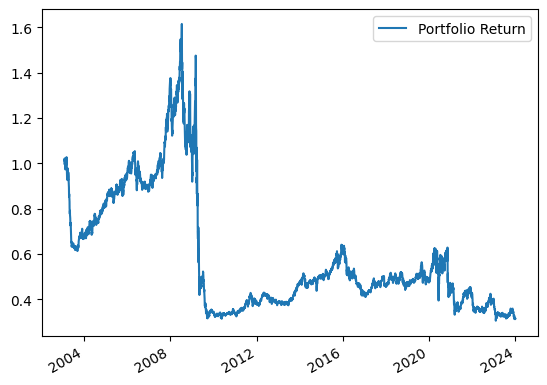

In [63]:
cum_returns = (1 + integrated_portfolio).cumprod()
cum_returns.plot()

<Axes: >

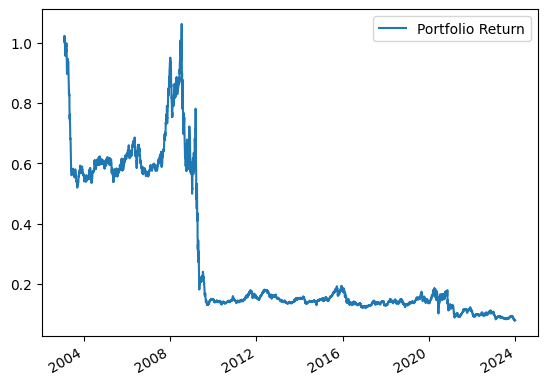

In [65]:
cum_returns = (1 + mixed_portfolio).cumprod()
cum_returns.plot()

In [40]:
mupor = integrated_portfolio.mean() * 252
sdpor = integrated_portfolio.std() * np.sqrt(252)
srpor = mupor / sdpor

print(f"Mu: {mupor[0]}")
print(f"Std: {sdpor[0]}")
print(f"Sharpe: {srpor[0]}")

Mu: -0.02699865794486582
Std: 0.23684464795721577
Sharpe: -0.11399310973555513


In [66]:
mupor = mixed_portfolio.mean() * 252
sdpor = mixed_portfolio.std() * np.sqrt(252)
srpor = mupor / sdpor

print(f"Mu: {mupor[0]}")
print(f"Std: {sdpor[0]}")
print(f"Sharpe: {srpor[0]}")

Mu: -0.08662580547840358
Std: 0.26315588529512157
Sharpe: -0.3291805744008168
